# Calculating Pearson's correlation coefficient

In [1]:
import numpy as np

In [2]:
def pearson_correlation(X, Y):
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    
    numerator = np.sum((X - mean_X) * (Y - mean_Y))
    denominator_X = np.sqrt(np.sum((X - mean_X)**2))
    denominator_Y = np.sqrt(np.sum((Y - mean_Y)**2))
    
    r = numerator / (denominator_X * denominator_Y)
    
    return r

In [3]:
# Example usage:
GovtSpend = np.array([35,34.6,34.7,36.3,40.3,39.2])
GDP = np.array([1.8,1.4,1.5,-1.2,-5.7,4.1])
Unemp = np.array([4.45,4.19,3.89,4,5.07,5.1])
Govt_GDP = pearson_correlation(GovtSpend, GDP)
Govt_Unemp = pearson_correlation(GovtSpend, Unemp)
print("Pearson's correlation coefficient between Govt Spend and GDP growth rate:", Govt_GDP)
print("Pearson's correlation coefficient between Govt Spend and Unemployment rate:", Govt_Unemp)

Pearson's correlation coefficient between Govt Spend and GDP growth rate: -0.446356544284914
Pearson's correlation coefficient between Govt Spend and Unemployment rate: 0.8732873547340542


# Hypothesis Testing for Govt Spending and GDP growth rate 

In [4]:
r1 = Govt_GDP  
r2 = Govt_Unemp
df = 4  #degrees of freedom (n-2)
t1 = (r1 * np.sqrt(df)) / np.sqrt(1 - r1**2)
t2 = (r2 * np.sqrt(df)) / np.sqrt(1 - r2**2)

In [5]:
t1

-0.9976061881279726

In [6]:
t2

3.584883013688596

In [7]:
import numpy as np
from scipy.stats import t

alpha = 0.05

t_statistic = (r1 * np.sqrt(df)) / np.sqrt(1 - r1**2)    # Calculating the test statistic

critical_value = t.ppf(1 - alpha / 2, df)  # Calculating Critical_value using Two-tailed test

p_value = 2 * (1 - t.cdf(abs(t_statistic), df))  # Calculating p_value using Two-tailed test

if abs(t_statistic) > critical_value:  # Determining if the null hypotehsis is rejected or not
    print("Reject the null hypothesis. There is a statistically significant linear relationship.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant linear relationship.")

print("Test Statistic:", t_statistic)
print("Critical Value:", critical_value)
print("P-Value:", p_value)


Fail to reject the null hypothesis. There is no statistically significant linear relationship.
Test Statistic: -0.9976061881279726
Critical Value: 2.7764451051977987
P-Value: 0.3749299201855987


<b>Note:</b> Based on these results:

1. The test statistic (-0.998) falls within the range of the critical values (-2.776 to 2.776). This means that the absolute value of the test statistic is less than the critical value.

2. The p-value (0.375) is greater than the chosen significance level alpha (0.05).

We can say that <b>there is no statistically significant linear relationship between Govt Spending and GDP growth rate!</b>


# Hypothesis testing Govt Spending and Unemployment Rate

In [8]:
alpha = 0.05

t_statistic = (r2 * np.sqrt(df)) / np.sqrt(1 - r2**2)    # Calculating the test statistic

critical_value = t.ppf(1 - alpha / 2, df)  # Calculating Critical_value using Two-tailed test

p_value = 2 * (1 - t.cdf(abs(t_statistic), df))  # Calculating p_value using Two-tailed test

if abs(t_statistic) > critical_value:  # Determining if the null hypotehsis is rejected or not
    print("Reject the null hypothesis. There is a statistically significant linear relationship.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant linear relationship.")

print("Test Statistic:", t_statistic)
print("Critical Value:", critical_value)
print("P-Value:", p_value)


Reject the null hypothesis. There is a statistically significant linear relationship.
Test Statistic: 3.584883013688596
Critical Value: 2.7764451051977987
P-Value: 0.023066886603954728


<b>Note:</b> Based on these results:

1. The test statistic (3.584) is greater than the critical value (2.776). This means that the absolute value of the test statistic is more than the critical value.

2. The p-value (0.023) is less than the chosen significance level alpha (0.05).

We can say that <b>there is sufficient evidence to conclude that there is statistically significant linear relationship between  Govt Spending and Unemployment Rate!</b>


# Regression Analysis - GDP growth rate vs Govt Spending 

In [9]:
import numpy as np
from scipy.stats import linregress

# Calculate the regression equation
slope, intercept, r_value, p_value, std_err = linregress(GovtSpend, GDP)

# Print the results
print("Below are the regression line constanst as per Y = b0 + b1*X")
print("Slope (b1):", slope)
print("Intercept (b0):", intercept)
print("R-squared:", r_value**2)

# Make predictions
new_X = 6  # Example new value of X
predicted_Y = intercept + slope * new_X
print("Predicted Y for X =", new_X, "is", predicted_Y)


Below are the regression line constanst as per Y = b0 + b1*X
Slope (b1): -0.6116515406771365
Intercept (b0): 22.754084017172953
R-squared: 0.1992341646259705
Predicted Y for X = 6 is 19.084174773110135


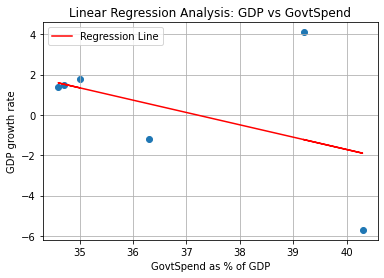

In [10]:
import matplotlib.pyplot as plt

plt.scatter(GovtSpend, GDP, label='')

# Calculate the predicted Y values based on the regression equation
predicted_Y = intercept + slope * GovtSpend

# Plot the regression line
plt.plot(GovtSpend, predicted_Y, color='red', label='Regression Line')

# Add labels and a legend
plt.xlabel('GovtSpend as % of GDP')
plt.ylabel('GDP growth rate')
plt.legend()

# Show the plot
plt.title('Linear Regression Analysis: GDP vs GovtSpend')
plt.grid(True)
plt.show()

<b> Note: </b>Clearly what we derived from the hypothesis testing is also visible here, we can see that we cannot assume linear relationship between GovtSpend as % of GDP and GDP growth rate which is now evident from the above graph. 

# Regression Analysis - Unemployment rate vs Govt Spending 

In [11]:
# Calculate the regression equation
slope, intercept, r_value, p_value, std_err = linregress(GovtSpend, Unemp)

# Print the results
print("Below are the regression line constanst as per Y = b0 + b1*X")
print("Slope (b1):", slope)
print("Intercept (b0):", intercept)
print("R-squared:", r_value**2)

# Make predictions
new_X = 6  # Example new value of X
predicted_Y = intercept + slope * new_X
print("Predicted Y for X =", new_X, "is", predicted_Y)

Below are the regression line constanst as per Y = b0 + b1*X
Slope (b1): 0.18595728493016692
Intercept (b0): -2.371533068854956
R-squared: 0.7626308039384021
Predicted Y for X = 6 is -1.2557893592739544


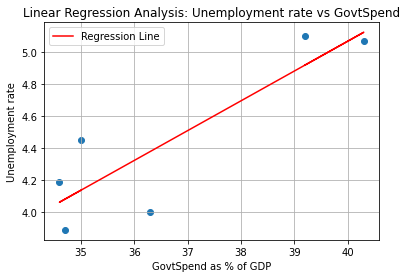

In [12]:
plt.scatter(GovtSpend, Unemp, label='')

# Calculate the predicted Y values based on the regression equation
predicted_Y = intercept + slope * GovtSpend

# Plot the regression line
plt.plot(GovtSpend, predicted_Y, color='red', label='Regression Line')

# Add labels and a legend
plt.xlabel('GovtSpend as % of GDP')
plt.ylabel('Unemployment rate')
plt.legend()

# Show the plot
plt.title('Linear Regression Analysis: Unemployment rate vs GovtSpend')
plt.grid(True)
plt.show()

<b>Note: </b>Clearly what we derived from the hypothesis testing is also visible here, we can see that we can very well assume linear relationship between GovtSpend as % of GDP and Unemployemnt rate which is now evident from the above graph. 

# Conclusions:

1. <b>GDP Growth rate and Government Spending as % of GDP</b> though depict certain value of correlation coefficient but are actually not signicant enough to show linear relationship in the hypothesis testing. From regression analysis also it is confirmed that GDP Growth rate and Government Spending as % of GDP <b>do not depict linear relationship</b>.


2. <b>Unemployment rate and Government Spending as % of GDP</b> depicted well enough correlation coefficient and also showed great significant linear relationship in hypothesis testing. From regression analysis also it is confirmed that Unemployment rate and Government Spending as % of GDP <b>depict great linear relationship</b>.